In [6]:
# -----------------------
# 1. Thư viện cần thiết
# -----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# -----------------------
# 2. Đọc dữ liệu
# -----------------------
df = pd.read_csv('csv/cartier_catalog.csv')
print("5 dòng đầu của dataset gốc:")
print(df.head())
print("\nThông tin tổng quan:")
print(df.info())
print("\nCác giá trị null:")
print(df.isnull().sum())

5 dòng đầu của dataset gốc:
         ref categorie              title   price         tags  \
0   B4084600     rings          Love ring  1650.0  yellow gold   
1   B4084900     rings          Love ring  3650.0     platinum   
2   B4084800     rings          Love ring  1650.0    pink gold   
3   B4084700     rings          Love ring  1770.0   white gold   
4   B4085000     rings  Love wedding band  1070.0  yellow gold   

                                         description  \
0          Love ring, 18K yellow gold. Width: 5.5mm.   
1        Love ring, 950/1000 platinum. Width: 5.5mm.   
2            Love ring, 18K rose gold. Width: 5.5mm.   
3           Love ring, 18K white gold. Width: 5.5mm.   
4  Love wedding band, 18K yellow gold. Width: 3.6mm.   

                                         image  
0     /content/dam/rcq/car/58/71/74/587174.png  
1  /content/dam/rcq/car/19/43/98/1/1943981.png  
2  /content/dam/rcq/car/10/28/64/0/1028640.png  
3  /content/dam/rcq/car/10/28/63/6/1028636

In [ ]:
# # -----------------------
# # 3. Tiền xử lý
# # -----------------------
# # OneHotEncode category & tags
# encoder = OneHotEncoder(sparse_output=False)
# encoded_features = encoder.fit_transform(df_ml[['categorie', 'tags']])
# encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['categorie', 'tags']))

# # Merge với target
# df_ml_encoded = pd.concat([encoded_df, df_ml['price'].reset_index(drop=True)], axis=1)

# # Features & target
# X = df_ml_encoded.drop('price', axis=1)
# y = df_ml_encoded['price']

# # Optional: chuẩn hóa (Linear Regression nhạy với scale)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


In [8]:
# -----------------------
# 3. Tiền xử lý dữ liệu
# -----------------------
df_ml = df[['categorie', 'tags', 'price']].copy()

# OneHotEncode category & tags
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_ml[['categorie', 'tags']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['categorie', 'tags']))

# Merge với target
df_ml_encoded = pd.concat([encoded_df, df_ml['price'].reset_index(drop=True)], axis=1)

print("\n5 dòng đầu sau OneHotEncode:")
print(df_ml_encoded.head())

# Features & target
X = df_ml_encoded.drop('price', axis=1)
y = df_ml_encoded['price']

# Optional: chuẩn hóa cho Linear Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



5 dòng đầu sau OneHotEncode:
   categorie_bracelets  categorie_earrings  categorie_necklaces  \
0                  0.0                 0.0                  0.0   
1                  0.0                 0.0                  0.0   
2                  0.0                 0.0                  0.0   
3                  0.0                 0.0                  0.0   
4                  0.0                 0.0                  0.0   

   categorie_rings  tags_non-rhodiumized white gold, tsavorite garnets, onyx  \
0              1.0                                                0.0          
1              1.0                                                0.0          
2              1.0                                                0.0          
3              1.0                                                0.0          
4              1.0                                                0.0          

   tags_pink gold  tags_pink gold, amazonite  \
0             0.0                     

In [11]:
# -----------------------
# 4. Chia train/test
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"\nSố lượng train/test: {X_train.shape[0]} / {X_test.shape[0]}")


Số lượng train/test: 553 / 139



Linear Regression:
RMSE = 46046.44, R² = 0.18
5 giá trị đầu tiên Actual vs Predicted:
     Actual      Predicted
0   21200.0   32918.284269
1   80000.0   28875.105028
2   12500.0   16939.211585
3  217000.0   41479.767161
4   54500.0  109814.385845


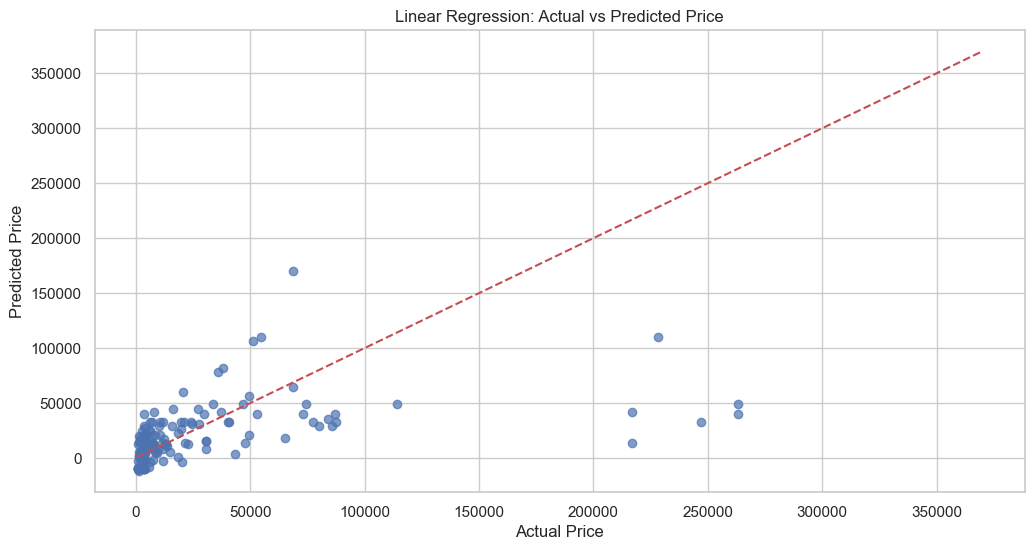


Random Forest:
RMSE = 47559.73, R² = 0.12
5 giá trị đầu tiên Actual vs Predicted:
     Actual      Predicted
0   21200.0   29592.083490
1   80000.0   23978.139911
2   12500.0   11603.505113
3  217000.0    2717.570089
4   54500.0  114419.709055


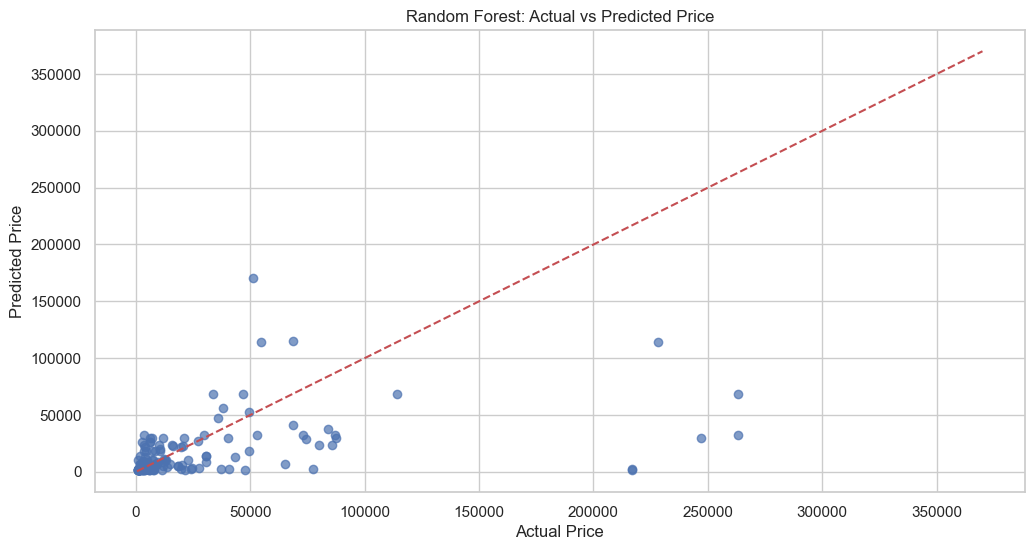


XGBoost:
RMSE = 47747.17, R² = 0.11
5 giá trị đầu tiên Actual vs Predicted:
     Actual      Predicted
0   21200.0   28709.125000
1   80000.0   23808.613281
2   12500.0   17286.748047
3  217000.0   24789.052734
4   54500.0  116179.570312


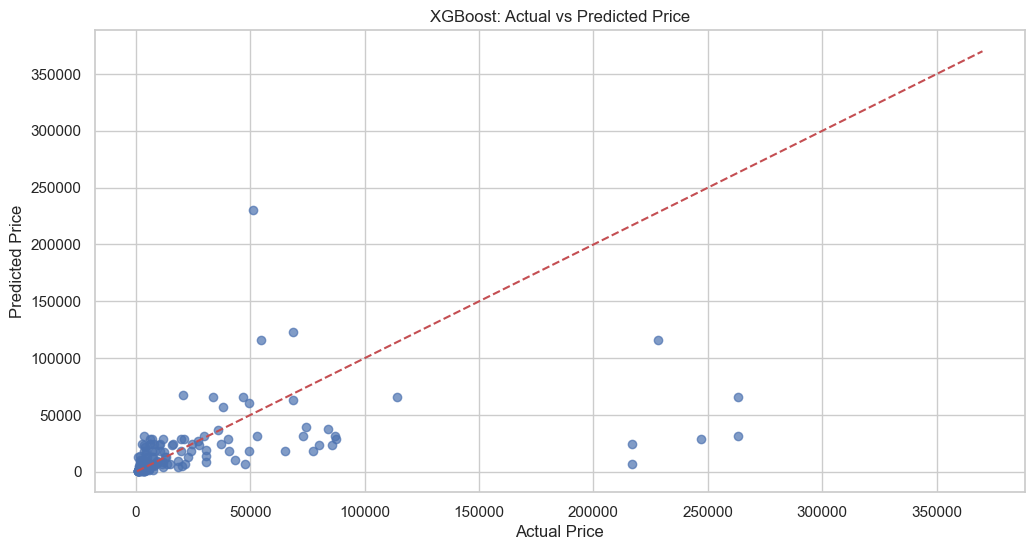

In [12]:
# -----------------------
# 5. Huấn luyện & đánh giá 3 model
# -----------------------
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, random_state=42, verbosity=0)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Đánh giá
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    
    print(f"\n{name}:")
    print(f"RMSE = {rmse:.2f}, R² = {r2:.2f}")
    
    # In vài giá trị actual vs predicted
    df_pred = pd.DataFrame({'Actual': y_test.values[:5], 'Predicted': y_pred[:5]})
    print("5 giá trị đầu tiên Actual vs Predicted:")
    print(df_pred)
    
    # Scatter plot actual vs predicted
    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{name}: Actual vs Predicted Price")
    plt.show()


In [13]:
# -----------------------
# 6. So sánh kết quả các model
# -----------------------
results_df = pd.DataFrame(results).T
print("\nSo sánh hiệu suất các model:")
display(results_df)


So sánh hiệu suất các model:


,RMSE,R2
Linear Regression,46046.438093,0.176092
Random Forest,47559.728282,0.121047
XGBoost,47747.172815,0.114105



Random Forest - Top 15 Feature Importance:


,Feature,Importance
38,"tags_platinum, emeralds, onyx, diamonds",0.120925
37,"tags_platinum, emeralds, diamonds",0.099905
91,"tags_yellow gold, emeralds, diamonds",0.092728
66,"tags_white gold, rubies, emeralds, mother-of-p...",0.082548
60,"tags_white gold, emeralds, onyx, diamonds",0.074631
58,"tags_white gold, emeralds, mother-of-pearl, di...",0.066042
0,categorie_bracelets,0.048760
61,"tags_white gold, emeralds, sapphire, mother-of...",0.048350
15,"tags_pink gold, emeralds, obsidians, diamonds",0.038199
3,categorie_rings,0.035894


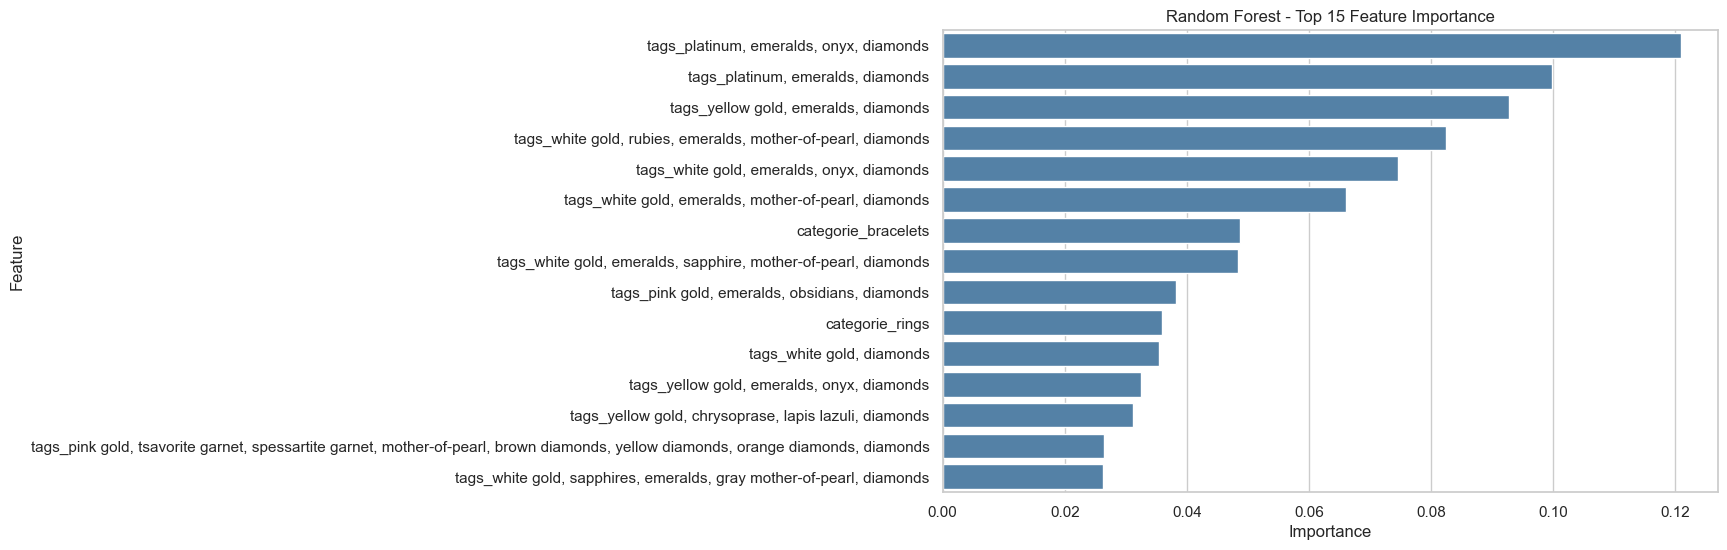


XGBoost - Top 15 Feature Importance:


,Feature,Importance
38,"tags_platinum, emeralds, onyx, diamonds",0.135702
91,"tags_yellow gold, emeralds, diamonds",0.097476
66,"tags_white gold, rubies, emeralds, mother-of-p...",0.091734
60,"tags_white gold, emeralds, onyx, diamonds",0.091633
37,"tags_platinum, emeralds, diamonds",0.084024
58,"tags_white gold, emeralds, mother-of-pearl, di...",0.067580
61,"tags_white gold, emeralds, sapphire, mother-of...",0.041502
81,"tags_yellow gold, chrysoprase, lapis lazuli, d...",0.037983
15,"tags_pink gold, emeralds, obsidians, diamonds",0.033769
51,"tags_white gold, diamonds",0.028193


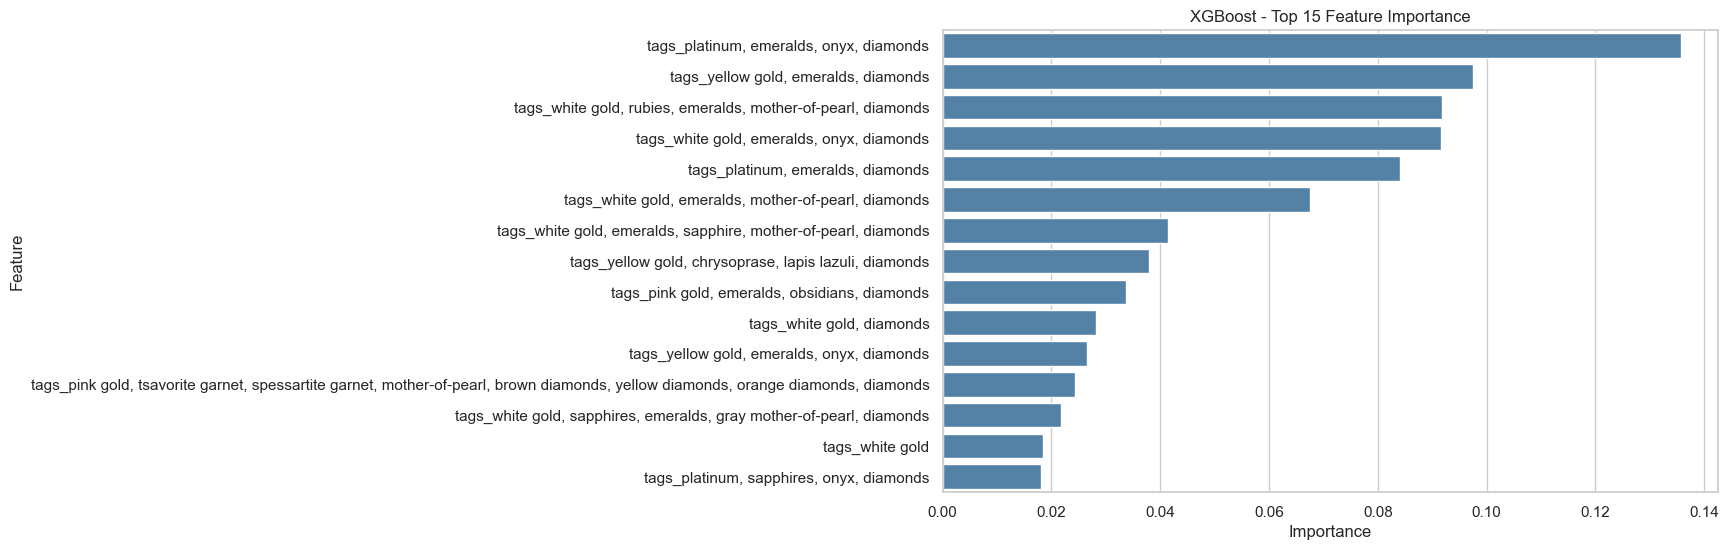

In [ ]:
for name in ['Random Forest', 'XGBoost']:
    model = models[name]
    importances = model.feature_importances_
    
    fi_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(15)
    
    print(f"\n{name} - Top 15 Feature Importance:")
    display(fi_df)
    
    # Vẽ bar chart với màu gradient viridis
    plt.figure(figsize=(10,6))
    colors = list(plt.cm.viridis(np.linspace(0, 1, fi_df.shape[0])))
    sns.barplot(data=fi_df, x='Importance', y='Feature', color='steelblue')
    plt.title(f"{name} - Top 15 Feature Importance")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()